In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 参数设置
total_devices = 10
keys_per_device = 1000000
total_time = 900  # 总共900秒（15分钟）
access_rate = 10000  # 每秒访问次数
sequence_length = 60  # 用于预测的历史序列长度

# 生成设备到key的映射
device_keys = {}
for device_id in range(1, total_devices + 1):
    device_keys[device_id] = [f"device_{device_id}:key_{i}" for i in range(1, keys_per_device + 1)]

# 生成访问日志
def generate_access_logs():
    logs = []
    for t in range(total_time):
        # 确定当前时间窗口的目标设备 (0-30s:设备1, 30-60s:设备2, 60-90s:设备3, 然后循环)
        window_index = (t // 30) % 3
        target_device = window_index + 1  # 设备ID为1,2,3
        
        # 生成每秒的访问请求
        for _ in range(access_rate):
            # 随机选择目标设备的一个key
            key_id = np.random.randint(0, keys_per_device)
            key = device_keys[target_device][key_id]
            logs.append([t, key, target_device])
    
    return pd.DataFrame(logs, columns=['timestamp', 'key', 'device_id'])

# 生成访问日志
print("生成访问日志...")
df_logs = generate_access_logs()

print(f"生成的日志记录数: {len(df_logs)}")

# 聚合每秒的访问计数
print("聚合访问计数...")
agg_df = df_logs.groupby(['timestamp', 'device_id']).size().unstack(fill_value=0)
agg_df = agg_df.reindex(range(total_time), fill_value=0)  # 确保所有秒都有记录

# 只保留设备1,2,3（因为只有这些设备被访问）
agg_df = agg_df[[1, 2, 3]] if 1 in agg_df.columns else pd.DataFrame(0, index=range(total_time), columns=[1,2,3])
agg_df.columns = ['count_dev1', 'count_dev2', 'count_dev3']



# 可视化前300秒的访问模式
plt.figure(figsize=(12, 6))
# plt.plot(agg_df.index[:300], agg_df['count_dev1'][:300], label='Device 1')
# plt.plot(agg_df.index[:300], agg_df['count_dev2'][:300], label='Device 2')
# plt.plot(agg_df.index[:300], agg_df['count_dev3'][:300], label='Device 3')
plt.plot(agg_df.index, agg_df['count_dev1'], label='Device 1')
plt.plot(agg_df.index, agg_df['count_dev2'], label='Device 2')
plt.plot(agg_df.index, agg_df['count_dev3'], label='Device 3')
plt.xlabel('Time (seconds)')
plt.ylabel('Access Count')
plt.title('Access Pattern for all Seconds')
plt.legend()
plt.show()

print("数据生成完成!")

生成访问日志...


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fcb38538940>>
Traceback (most recent call last):
  File "/home/ming/anaconda3/envs/dl/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


生成访问日志并保存到: access_logs/access_log_20250911_204155.csv
已生成 0 秒的访问日志...
已生成 100 秒的访问日志...
已生成 200 秒的访问日志...
已生成 300 秒的访问日志...
已生成 400 秒的访问日志...
已生成 500 秒的访问日志...
已生成 600 秒的访问日志...
已生成 700 秒的访问日志...
已生成 800 秒的访问日志...
日志生成完成! 共 9000000 条记录
聚合访问计数...


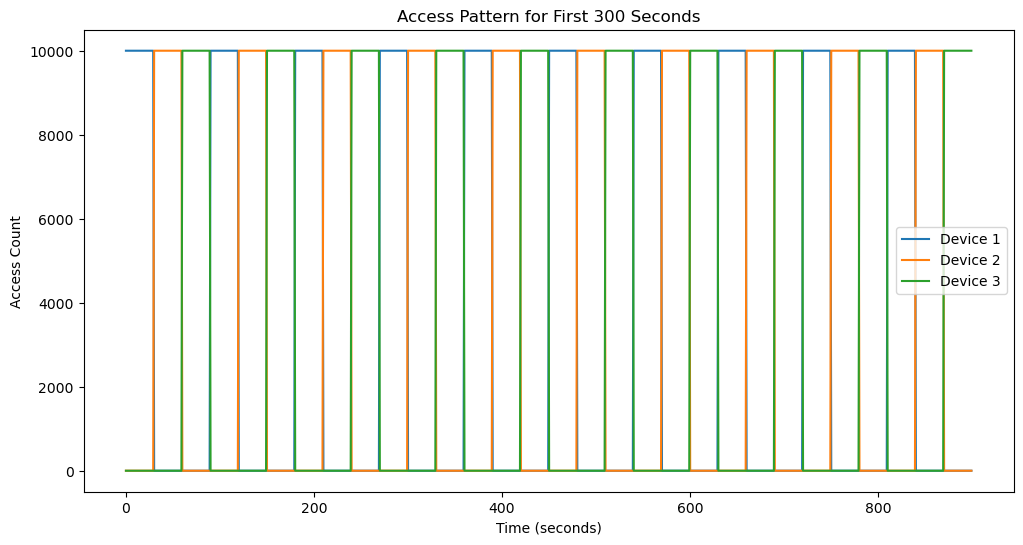

数据生成和保存完成!


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
import os
from datetime import datetime, timedelta

# 参数设置
total_devices = 10
keys_per_device = 1000000
total_time = 900  # 总共900秒（15分钟）
access_rate = 10000  # 每秒访问次数
sequence_length = 60  # 用于预测的历史序列长度

# 日志文件配置
log_dir = "access_logs"
os.makedirs(log_dir, exist_ok=True)  # 确保日志目录存在

# 生成设备到key的映射
device_keys = {}
for device_id in range(1, total_devices + 1):
    device_keys[device_id] = [f"device_{device_id}:key_{i}" for i in range(1, keys_per_device + 1)]

# 生成访问日志并保存到文件
def generate_and_save_access_logs():
    # 创建带时间戳的日志文件名
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    log_filename = os.path.join(log_dir, f"access_log_{timestamp}.csv")
    
    # 定义日志文件头
    log_header = ["timestamp", "key", "device_id", "access_time"]
    
    # 设置起始时间
    start_time = datetime.now().replace(microsecond=0)
    
    logs = []
    print(f"生成访问日志并保存到: {log_filename}")
    
    # 打开日志文件准备写入
    with open(log_filename, 'w', newline='') as log_file:
        writer = csv.writer(log_file)
        writer.writerow(log_header)  # 写入表头
        
        for t in range(total_time):
            # 确定当前时间窗口的目标设备 (0-30s:设备1, 30-60s:设备2, 60-90s:设备3, 然后循环)
            window_index = (t // 30) % 3
            target_device = window_index + 1  # 设备ID为1,2,3
            
            # 计算实际访问时间
            access_time = start_time + timedelta(seconds=t)
            
            # 生成每秒的访问请求
            for _ in range(access_rate):
                # 随机选择目标设备的一个key
                key_id = np.random.randint(0, keys_per_device)
                key = device_keys[target_device][key_id]
                
                # 创建日志记录
                log_record = [t, key, target_device, access_time.strftime("%Y-%m-%d %H:%M:%S")]
                
                # 写入日志文件
                writer.writerow(log_record)
                
                # 同时添加到内存中的列表（用于后续处理）
                logs.append(log_record)
            
            # 每100秒输出一次进度
            if t % 100 == 0:
                print(f"已生成 {t} 秒的访问日志...")
    
    print(f"日志生成完成! 共 {len(logs)} 条记录")
    return pd.DataFrame(logs, columns=log_header), log_filename

# 从日志文件加载数据的函数
def load_access_logs(log_file_path):
    print(f"从文件加载访问日志: {log_file_path}")
    return pd.read_csv(log_file_path)

# 生成并保存访问日志
df_logs, log_file_path = generate_and_save_access_logs()

# 也可以从文件重新加载（演示用途）
# df_logs_loaded = load_access_logs(log_file_path)

# 聚合每秒的访问计数
print("聚合访问计数...")
# 确保timestamp列是整数类型
df_logs['timestamp'] = df_logs['timestamp'].astype(int)
agg_df = df_logs.groupby(['timestamp', 'device_id']).size().unstack(fill_value=0)
agg_df = agg_df.reindex(range(total_time), fill_value=0)  # 确保所有秒都有记录

# 只保留设备1,2,3（因为只有这些设备被访问）
agg_df = agg_df[[1, 2, 3]] if 1 in agg_df.columns else pd.DataFrame(0, index=range(total_time), columns=[1,2,3])
agg_df.columns = ['count_dev1', 'count_dev2', 'count_dev3']

# 可视化前300秒的访问模式
plt.figure(figsize=(12, 6))
plt.plot(agg_df.index, agg_df['count_dev1'], label='Device 1')
plt.plot(agg_df.index, agg_df['count_dev2'], label='Device 2')
plt.plot(agg_df.index, agg_df['count_dev3'], label='Device 3')
plt.xlabel('Time (seconds)')
plt.ylabel('Access Count')
plt.title('Access Pattern for First 300 Seconds')
plt.legend()
plt.savefig(os.path.join(log_dir, 'access_pattern.png'))  # 保存图表
plt.show()

print("数据生成和保存完成!")

使用设备: cuda
GPU名称: NVIDIA GeForce GTX 1650 Ti
GPU内存: 3.8 GB
加载数据...
数据形状: (5865763, 4)
聚合访问计数...
587len(data)
训练样本数: 421
测试样本数: 106
模型参数总数: 200,579
开始训练...


/home/ming/anaconda3/envs/dl/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch: 1/10 [0/421 (0%)]	Loss: 1.083142
Epoch [1/10], Train Loss: 0.9484, Train Acc: 66.03%, Test Loss: 0.5767, Test Acc: 84.91%, LR: 0.001000
Epoch: 2/10 [0/421 (0%)]	Loss: 0.720243
Epoch [2/10], Train Loss: 0.3577, Train Acc: 88.36%, Test Loss: 0.4445, Test Acc: 82.08%, LR: 0.001000
Epoch: 3/10 [0/421 (0%)]	Loss: 0.227601
Epoch [3/10], Train Loss: 0.2807, Train Acc: 88.84%, Test Loss: 0.2906, Test Acc: 89.62%, LR: 0.001000
Epoch: 4/10 [0/421 (0%)]	Loss: 0.257070
Epoch [4/10], Train Loss: 0.3203, Train Acc: 88.12%, Test Loss: 0.2480, Test Acc: 90.57%, LR: 0.001000
Epoch: 5/10 [0/421 (0%)]	Loss: 0.185791
Epoch [5/10], Train Loss: 0.2605, Train Acc: 88.84%, Test Loss: 0.2288, Test Acc: 88.68%, LR: 0.001000
Epoch: 6/10 [0/421 (0%)]	Loss: 0.188377
Epoch [6/10], Train Loss: 0.1859, Train Acc: 93.59%, Test Loss: 0.1799, Test Acc: 89.62%, LR: 0.001000
Epoch: 7/10 [0/421 (0%)]	Loss: 0.056275
Epoch [7/10], Train Loss: 0.1594, Train Acc: 92.40%, Test Loss: 0.0923, Test Acc: 95.28%, LR: 0.001000

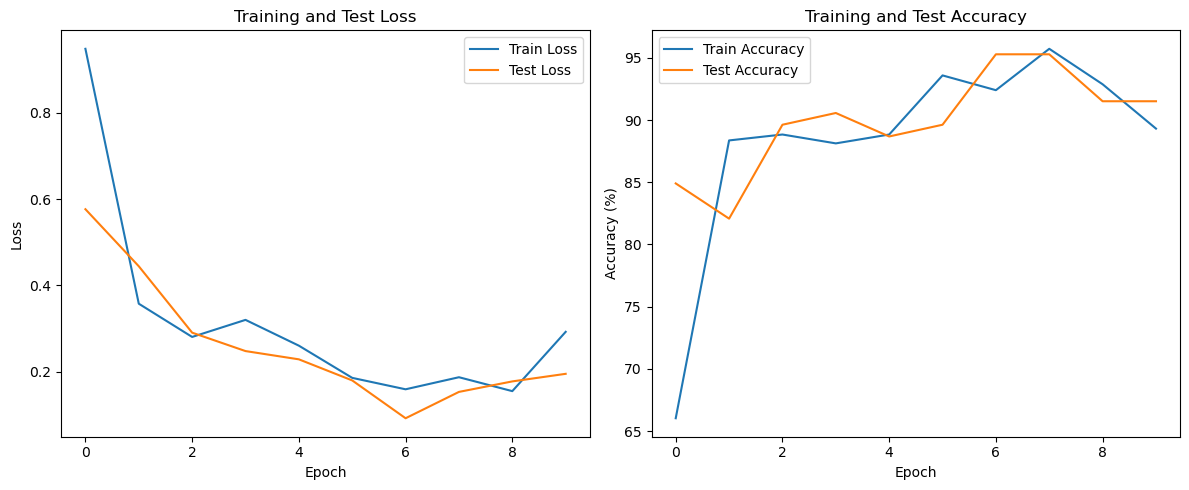

模型已保存到: lstm_predictor.pth


In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
import os

# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")
if torch.cuda.is_available():
    print(f"GPU名称: {torch.cuda.get_device_name(0)}")
    print(f"GPU内存: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

# 参数设置
sequence_length = 60 # 用于预测的历史序列长度
batch_size = 32      # 批处理大小
num_epochs = 10      # 训练轮数
learning_rate = 0.001 # 学习率

# 数据加载和预处理函数
def load_and_preprocess_data(file_path):
    """
    加载和预处理访问日志数据
    """
    print("加载数据...")
    df = pd.read_csv(file_path)
    print(f"数据形状: {df.shape}")
    
    # 确保时间戳是整数
    df['timestamp'] = df['timestamp'].astype(int)
    
    # 聚合每秒的访问计数
    print("聚合访问计数...")
    agg_df = df.groupby(['timestamp', 'device_id']).size().unstack(fill_value=0)
    
    # 确保所有时间戳都有记录
    max_time = df['timestamp'].max()
    agg_df = agg_df.reindex(range(max_time + 1), fill_value=0)
    
    # 只保留设备1,2,3
    agg_df = agg_df[[1, 2, 3]] if 1 in agg_df.columns else pd.DataFrame(0, index=range(max_time + 1), columns=[1,2,3])
    agg_df.columns = ['count_dev1', 'count_dev2', 'count_dev3']
    
    return agg_df

# 创建序列数据集
def create_sequences(data, seq_length):
    """
    创建用于LSTM训练的序列数据
    """
    xs, ys = [], []
    print(f'{len(data)}len(data)')  #显示聚合后的数据长度(时间点数量)
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 定义LSTM模型
class LSTMPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
        super(LSTMPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM层
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        # 全连接层
        self.fc = nn.Linear(hidden_size, num_classes)
        
        # Dropout层
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # 初始化隐藏状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # LSTM前向传播
        out, _ = self.lstm(x, (h0, c0))
        
        # 只取最后一个时间步的输出
        out = out[:, -1, :]
        
        # 应用dropout和全连接层
        out = self.dropout(out)
        out = self.fc(out)
        
        return out

# 训练函数
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    """
    训练模型
    """
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    # 学习率调度器
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=10, verbose=True
    )
    
    print("开始训练...")
    start_time = time.time()
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            # 前向传播
            output = model(data)
            loss = criterion(output, target)
            
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            
            # 梯度裁剪，防止梯度爆炸
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            # 统计
            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
            
            # 每100个batch输出一次进度
            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch+1}/{num_epochs} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                      f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
        
        # 计算训练准确率和损失
        train_accuracy = 100. * train_correct / train_total
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        
        # 测试阶段
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0
        
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                _, predicted = torch.max(output.data, 1)
                test_total += target.size(0)
                test_correct += (predicted == target).sum().item()
        
        # 计算测试准确率和损失
        test_accuracy = 100. * test_correct / test_total
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        test_accuracies.append(test_accuracy)
        
        # 更新学习率
        scheduler.step(avg_test_loss)
        
        # 输出 epoch 结果
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
              f'Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%, '
              f'LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    # 输出训练总时间
    end_time = time.time()
    print(f'训练完成! 总耗时: {(end_time - start_time)/60:.2f} 分钟')
    
    return train_losses, test_losses, train_accuracies, test_accuracies

# 主函数
def main():
    # 加载数据
    data_file = "/home/ming/桌面/PLIN-N /PLIN-N/access_logs/log.csv"  # 替换为您的数据文件路径
    agg_df = load_and_preprocess_data(data_file)
    
    # 标准化特征
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(agg_df.values)
    
    # 创建序列数据集
    X, y = create_sequences(scaled_data, sequence_length)
    
    # 将目标转换为类别（设备ID）
    # 找到每个时间步访问次数最多的设备
    y_labels = np.argmax(agg_df.values[sequence_length:], axis=1)
    
    # 转换为PyTorch张量
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.LongTensor(y_labels)
    
    # 创建数据集和数据加载器
    dataset = TensorDataset(X_tensor, y_tensor)
    
    # 划分训练集和测试集
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(
        dataset, [train_size, test_size], 
        generator=torch.Generator().manual_seed(42)  # 设置随机种子以确保可重复性
    )
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    
    print(f"训练样本数: {len(train_dataset)}")
    print(f"测试样本数: {len(test_dataset)}")
    
    # 初始化模型
    input_size = 3  # 3个设备的访问计数
    hidden_size = 128
    num_layers = 2
    num_classes = 3  # 预测3个设备中的哪一个
    
    model = LSTMPredictor(input_size, hidden_size, num_layers, num_classes).to(device)
    
    # 计算模型参数数量
    total_params = sum(p.numel() for p in model.parameters())
    print(f"模型参数总数: {total_params:,}")
    
    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    
    # 训练模型
    train_losses, test_losses, train_accuracies, test_accuracies = train_model(
        model, train_loader, test_loader, criterion, optimizer, num_epochs
    )
    
    # 绘制训练曲线
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Test Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Training and Test Accuracy')
    
    plt.tight_layout()
    plt.savefig('training_curves.png')
    plt.show()
    
    # 保存模型
    model_path = 'lstm_predictor.pth'
    torch.save({
        'model_state_dict': model.state_dict(),
        'scaler': scaler,
        'input_size': input_size,
        'hidden_size': hidden_size,
        'num_layers': num_layers,
        'num_classes': num_classes,
        'sequence_length': sequence_length
    }, model_path)
    
    print(f"模型已保存到: {model_path}")

# 预测函数
def predict_next_device(model_path, recent_data):
    """
    使用训练好的模型预测下一个时间步最可能访问的设备
    """
    # 加载模型
    checkpoint = torch.load(model_path)
    
    model = LSTMPredictor(
        checkpoint['input_size'], 
        checkpoint['hidden_size'], 
        checkpoint['num_layers'], 
        checkpoint['num_classes']
    ).to(device)
    
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    scaler = checkpoint['scaler']
    sequence_length = checkpoint['sequence_length']
    
    # 预处理输入数据
    if len(recent_data) < sequence_length:
        raise ValueError(f"需要至少 {sequence_length} 个时间步的数据，但只提供了 {len(recent_data)} 个")
    
    # 使用最近的数据
    input_data = recent_data[-sequence_length:]
    
    # 标准化
    input_scaled = scaler.transform(input_data)
    
    # 转换为PyTorch张量并添加批次维度
    input_tensor = torch.FloatTensor(input_scaled).unsqueeze(0).to(device)
    
    # 进行预测
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.softmax(output, dim=1)
        _, predicted = torch.max(output.data, 1)
        predicted_device = predicted.item() + 1  # 转换为设备ID (1,2,3)
    
    # 输出预测结果
    print(f"预测下一个时间步最可能访问的设备: 设备{predicted_device}")
    print(f"设备1概率: {probabilities[0][0].item()*100:.2f}%")
    print(f"设备2概率: {probabilities[0][1].item()*100:.2f}%")
    print(f"设备3概率: {probabilities[0][2].item()*100:.2f}%")
    
    return predicted_device, probabilities.cpu().numpy()

if __name__ == "__main__":
    main()
    
    # 预测示例（需要提供最近的历史数据）
    # 假设我们有一些历史数据
    # recent_history = [...]  # 形状应为 (n, 3)，其中n >= sequence_length
    # predicted_device, probabilities = predict_next_device('lstm_predictor.pth', recent_history)